# Unsupervised Learning: Clustering and Anomaly Detection

Unsupervised learning is a type of machine learning where the algorithm learns from data that has not been labeled or categorized. Instead of predicting an output, the goal is to find interesting patterns or structures within the data itself.

## I. Clustering with K-Means

Clustering is the task of grouping a set of data points in such a way that points in the same group (called a **cluster**) are more similar to each other than to those in other clusters.

### The K-Means Algorithm
K-Means is the most popular and widely used clustering algorithm. The core idea is to find *K* cluster centers (centroids) and assign each data point to the nearest centroid.

#### The Two Steps of K-Means
The algorithm iteratively repeats two steps until it converges:
1.  **Cluster Assignment**: For each data point, assign it to the closest cluster centroid ($\mu_k$).
2.  **Move Centroid**: Update the position of each cluster centroid by moving it to the mean (average) of all the data points assigned to it.

#### The Formal Algorithm
1.  **Initialize**: Randomly initialize K **cluster centroids** $\mu_1, \mu_2, ..., \mu_K$. A common method is to randomly pick K examples from the training set and set the centroids to their locations.
2.  **Repeat until convergence**:
    - **For** each training example $i=1, ..., m$:
      - Find the closest centroid to $x^{(i)}$ and assign the example to that cluster. Let $c^{(i)}$ be the index of the closest cluster.
      $$ c^{(i)} := \underset{k}{\min} \ ||x^{(i)} - \mu_k||^2 $$
    - **For** each cluster $k=1, ..., K$:
      - Update the centroid $\mu_k$ to be the average of all points assigned to cluster $k$.
      $$ \mu_k := \text{average of all } x^{(i)} \text{ where } c^{(i)}=k $$

### K-Means Optimization Objective
K-Means is implicitly trying to minimize a cost function, often called the **distortion function**, which is the average squared distance between each data point and its assigned centroid.
$$ J(c^{(1)},...,c^{(m)},\mu_1,...,\mu_K) = \frac{1}{m}\sum_{i=1}^{m} ||x^{(i)} - \mu_{c^{(i)}}||^2 $$
The two steps of K-Means (Cluster Assignment and Move Centroid) are a way of iteratively minimizing this cost function $J$.

### Random Initialization and Local Optima
- Because K-Means starts with a random initialization, it can get stuck in a **local optimum**, resulting in a suboptimal clustering.
- **Solution**: Run K-Means multiple times (e.g., 50-100 times) with different random initializations. After each run, compute the final cost $J$. Select the clustering that resulted in the **lowest cost**.

### Choosing the Number of Clusters (K)
- The choice of K is often ambiguous and depends on the application.
- The **Elbow Method** (plotting the cost $J$ vs. K) is sometimes used, but often the plot doesn't have a clear "elbow," making it hard to interpret.
- **Recommended approach**: Choose K based on how well the resulting clusters serve a downstream purpose. For example, in T-shirt sizing, you might choose K=3 (S, M, L) or K=5 (XS, S, M, L, XL) based on business needs like manufacturing costs versus customer fit.

---

## II. Anomaly Detection

**Anomaly detection** is the task of identifying rare items, events, or observations which raise suspicions by differing significantly from the majority of the data.

### The Core Idea: Density Estimation
The standard approach is to build a model of what "normal" data looks like.
1.  Given a training set of normal examples, build a probability model $p(x)$.
2.  This model, $p(x)$, will assign a high probability to "normal" data points and a very low probability to "anomalous" data points.
3.  For a new example $x_{test}$, we calculate $p(x_{test})$. If this probability is below a certain small threshold $\epsilon$, we flag it as an anomaly.
    - If $p(x_{test}) < \epsilon \implies \text{Anomaly}$
    - If $p(x_{test}) \ge \epsilon \implies \text{Normal}$

### The Gaussian (Normal) Distribution
To model $p(x)$, we often assume that each feature follows a Gaussian distribution.
- A Gaussian distribution is defined by two parameters: the mean $\mu$ (center) and the variance $\sigma^2$ (spread or width).
- Given a dataset for a single feature $\{x^{(1)}, ..., x^{(m)}\}$, we can estimate these parameters as:
  $$ \mu = \frac{1}{m} \sum_{i=1}^{m} x^{(i)} $$
  $$ \sigma^2 = \frac{1}{m} \sum_{i=1}^{m} (x^{(i)} - \mu)^2 $$

### The Anomaly Detection Algorithm
1.  **Choose features** $x_j$ that you think might be indicative of anomalies.
2.  **Fit parameters**: For each feature $j=1, ..., n$, calculate $\mu_j$ and $\sigma_j^2$ from your training data (which consists of only normal examples).
3.  **Calculate probability**: For a new example $x$, the probability $p(x)$ is calculated under the assumption that the features are independent:
    $$ p(x) = \prod_{j=1}^{n} p(x_j; \mu_j, \sigma_j^2) $$
    where $p(x_j; \mu_j, \sigma_j^2)$ is the value from the Gaussian distribution for feature $x_j$.
4.  **Flag anomaly**: If $p(x) < \epsilon$, flag the example as an anomaly.

### Developing and Evaluating an Anomaly Detection System
- To make good decisions (e.g., choosing features, setting $\epsilon$), you need a way to evaluate your algorithm.
- It's highly recommended to create a cross-validation and test set that contain some known anomalies (y=1) and many normal examples (y=0).
- You can then select the value of $\epsilon$ on the cross-validation set that performs best on metrics like the **F1-score**, which is suitable for skewed datasets.

### Anomaly Detection vs. Supervised Learning

| Use Anomaly Detection when...                                | Use Supervised Learning when...                              |
| :----------------------------------------------------------- | :----------------------------------------------------------- |
| You have a **very small** number of positive examples (anomalies, e.g., 0-20) and a large number of negative (normal) examples. | You have a **reasonable number** of both positive and negative examples. |
| **Future anomalies might look different** from the ones you've seen before (e.g., new types of fraud). | **Future positive examples are likely to be similar** to the ones in the training set (e.g., spam email). |

### Feature Engineering for Anomaly Detection
Good features are critical.
1.  **Transform non-Gaussian features**: The algorithm assumes features are Gaussian. If a feature's histogram is highly skewed, try transformations like `log(x)`, `sqrt(x)`, or $x^{1/3}$ to make it more bell-shaped.
2.  **Error Analysis**: If an anomaly is missed by your algorithm, examine it. Create a new feature that helps that anomaly "stand out" (i.e., a feature where that example has an unusually large or small value). For example, creating a new feature like `cpu_load / network_traffic` might reveal anomalies that individual features would miss.

*After this section, insert the Python code block.*

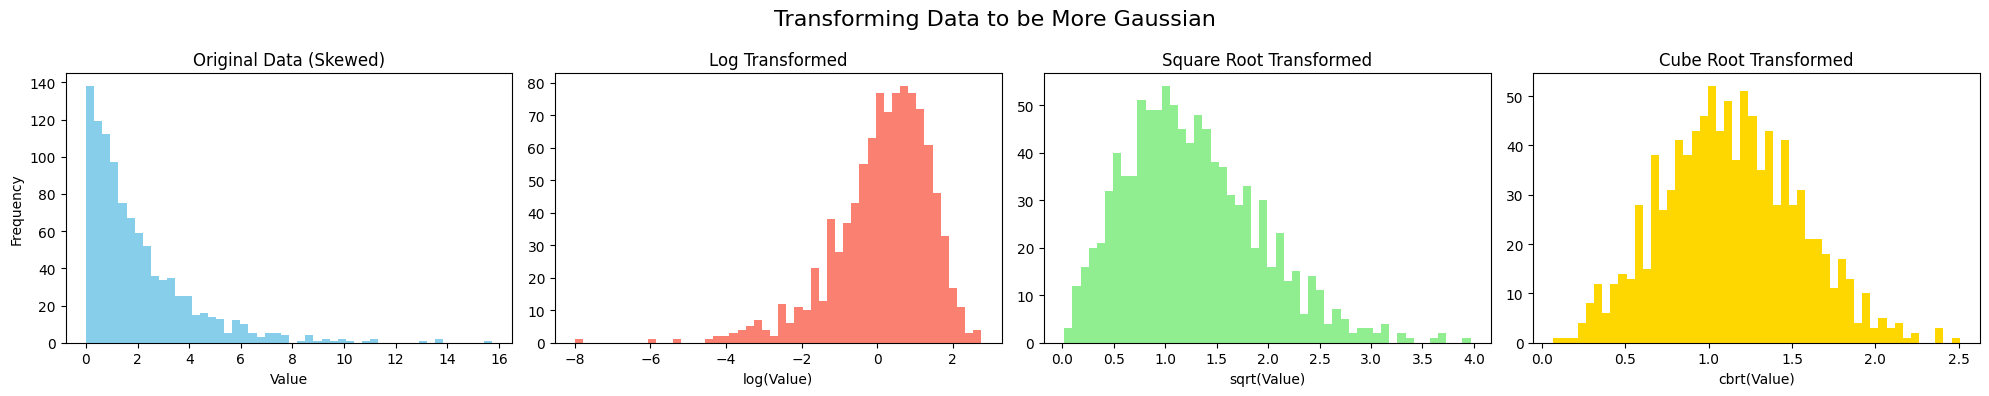

Notice how the transformations (especially log and cube root) make the skewed distribution more symmetric and bell-shaped.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some skewed data (non-Gaussian)
original_data = np.random.exponential(scale=2, size=1000)

# Create transformed versions of the data
log_transformed_data = np.log(original_data + 1e-6) # Add small constant to avoid log(0)
sqrt_transformed_data = np.sqrt(original_data)
cbrt_transformed_data = np.cbrt(original_data) # Cube root transformation

# Plotting the histograms to see the effect of transformations
fig, axs = plt.subplots(1, 4, figsize=(20, 4), tight_layout=True)

# Original Data
axs[0].hist(original_data, bins=50, color='skyblue')
axs[0].set_title('Original Data (Skewed)')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Log Transformed Data
axs[1].hist(log_transformed_data, bins=50, color='salmon')
axs[1].set_title('Log Transformed')
axs[1].set_xlabel('log(Value)')

# Square Root Transformed Data
axs[2].hist(sqrt_transformed_data, bins=50, color='lightgreen')
axs[2].set_title('Square Root Transformed')
axs[2].set_xlabel('sqrt(Value)')

# Cube Root Transformed Data
axs[3].hist(cbrt_transformed_data, bins=50, color='gold')
axs[3].set_title('Cube Root Transformed')
axs[3].set_xlabel('cbrt(Value)')

plt.suptitle('Transforming Data to be More Gaussian', fontsize=16)
plt.show()

print("Notice how the transformations (especially log and cube root) make the skewed distribution more symmetric and bell-shaped.")